<a href="https://colab.research.google.com/github/FayeValentain/it-cert-automation-practice/blob/master/04_PythonData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R, PYTHON AND JULIA: DO YOU KNOW THEM ALL?

## ICON-Institute
Online webinar

2024 - March 11, 13, 15

### [Dr. Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Python Data
Day 1/3 - Part 4


# Fetch Data

## from disk

In [ ]:
import os
import pandas as pd

df = pd.read_csv(os.path.join('.', 'sample_data', 'california_housing_test.csv'))
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


## from URL

In [ ]:
from requests import get
import pandas as pd

def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(filename, 'wb')
    csv_file.write(res.content)
    csv_file.close()

download_save('https://kauthentechstorage.blob.core.windows.net/datasets/kaggle_survey_2022_responses.csv',
              'kaggle_survey_2022_responses.csv')
df = pd.read_csv('kaggle_survey_2022_responses.csv', header=[0, 1], low_memory=False)

In [ ]:
!ls

kaggle_survey_2022_responses.csv  sample_data


## from database (via an API)


### Eurostat database

- [Eurostat Database](https://ec.europa.eu/eurostat/data/database)
- [Eurostat REST Endpoint](https://wikis.ec.europa.eu/display/EUROSTATHELP/API+Statistics+-+data+query)
- [Eurostat API for Python](https://pypi.org/project/eurostatapiclient/)
- [Eurostat API Python code](https://github.com/opus-42/eurostat-api-client)


In [ ]:
#install the library
!pip install eurostatapiclient

### Happiness - Satisfaction Regression

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/ilc_pw01$DV_528/default/table?lang=en" width="1000" height="600"></iframe>

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/statistics-explained/index.php?title=EU_statistics_on_income_and_living_conditions_(EU-SILC)_methodology_-_2013_personal_well-being_indicators" width="1100" height="600"></iframe>

In [ ]:
from eurostatapiclient import EurostatAPIClient
import time

client = EurostatAPIClient('1.0', 'json', 'en')

df = []
for sat_cat in ['ACCSAT', 'COMSAT', 'FINSAT', 'GREENSAT', 'JOBSAT', 'LIFESAT', 'LIVENVSAT', 'MEANLIFE', 'RELSAT', 'TIMESAT']:

  params = {
      'geo': ['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'AL', 'XK'],
      'indic_wb': sat_cat,
      'isced11': ['ED0-2', 'ED3_4', 'ED5-8', 'ED5_6'],
      'age': ['Y16-24', 'Y16-24', 'Y25-34', 'Y35-49', 'Y50-64', 'Y65-74'],
      'unit': 'RTG',
      'sex': ['F', 'M'],
      'time': ['2013', '2018'],
      }

  print(sat_cat)
  dfi = client.get_dataset('ilc_pw01', params=params).to_dataframe()
  df.append(dfi)

  time.sleep(1)

df = pd.concat(df, axis=0, ignore_index=True)
df = df.pivot(values='values', columns='indic_wb', index=df.columns.drop(['indic_wb', 'values', 'unit'])).reset_index()
df.dropna(subset=['LIFESAT'], axis=0, inplace=True)
df.drop('freq', axis=1, inplace=True)

df

ACCSAT
COMSAT
FINSAT
GREENSAT
JOBSAT
LIFESAT
LIVENVSAT
MEANLIFE
RELSAT
TIMESAT


indic_wb,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
1,ED0-2,F,Y16-24,AL,2018,NaN,NaN,4.9,NaN,5.6,6.1,NaN,NaN,7.2,5.9
2,ED0-2,F,Y16-24,AT,2013,8.6,8.4,7.5,8.1,8.5,8.2,8.2,7.8,8.8,7.2
3,ED0-2,F,Y16-24,AT,2018,NaN,NaN,7.5,NaN,8.1,8.0,NaN,NaN,8.9,7.3
4,ED0-2,F,Y16-24,BE,2013,7.8,NaN,6.7,6.7,NaN,7.7,7.4,8.0,8.1,7.7
5,ED0-2,F,Y16-24,BE,2018,NaN,NaN,6.8,NaN,NaN,7.8,NaN,NaN,8.0,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934,ED5_6,M,Y65-74,MT,2013,8.2,NaN,7.5,6.7,NaN,7.9,7.1,8.4,8.9,7.6
2944,ED5_6,M,Y65-74,RO,2013,8.0,NaN,7.1,7.4,NaN,7.5,7.3,7.6,7.9,7.9
2948,ED5_6,M,Y65-74,SE,2013,8.9,8.6,8.8,8.9,8.7,8.4,8.3,8.3,8.7,8.6
2954,ED5_6,M,Y65-74,TR,2013,7.2,6.8,6.1,6.4,7.0,6.2,7.3,7.2,7.7,6.5


# Save Data

## to disk

In [ ]:
!ls

kaggle_survey_2022_responses.csv  sample_data


In [ ]:
df.to_csv('happiness.csv', index=False)

In [ ]:
!ls

happiness.csv  kaggle_survey_2022_responses.csv  sample_data


In [ ]:
# now we can read it from disk
df_happiness = pd.read_csv('happiness.csv')
df_happiness.sample(10)

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
374,ED0-2,M,Y16-24,EE,2018,NaN,NaN,6.4,NaN,7.9,7.8,NaN,NaN,7.9,7.4
49,ED0-2,F,Y16-24,NL,2013,8.5,NaN,7.9,7.9,NaN,8.2,7.8,8.0,8.3,7.8
1459,ED5-8,F,Y16-24,LT,2013,8.0,8.0,7.3,8.1,8.2,8.5,8.2,8.6,8.8,7.5
733,ED3_4,F,Y16-24,FI,2013,8.3,7.9,7.2,8.1,8.2,8.2,8.0,8.2,8.5,7.6
1149,ED3_4,M,Y25-34,CH,2013,7.8,7.8,7.0,8.0,7.7,7.8,7.6,7.6,8.7,6.5
578,ED0-2,M,Y50-64,CZ,2018,NaN,NaN,4.3,NaN,NaN,5.0,NaN,NaN,8.0,7.0
1143,ED3_4,M,Y25-34,AT,2013,7.8,7.9,7.0,8.2,8.0,8.1,8.2,7.9,8.4,7.2
304,ED0-2,F,Y65-74,EL,2018,NaN,NaN,4.6,NaN,5.1,6.0,NaN,NaN,7.0,5.2
1069,ED3_4,F,Y65-74,XK,2018,NaN,NaN,5.4,NaN,NaN,7.4,NaN,NaN,9.2,8.3
1234,ED3_4,M,Y35-49,EL,2018,NaN,NaN,5.1,NaN,6.2,6.4,NaN,NaN,6.9,5.4


## to your Google Drive

This code works on Colab

In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive', force_remount=True)
data_dir = os.path.join('gdrive', 'My Drive', 'ICON', 'PythonJuliaR', 'Edition 2024-03', 'data')
os.makedirs(data_dir, exist_ok=True)

Mounted at /content/gdrive


In [ ]:
df.to_csv(os.path.join(data_dir, 'happiness.csv'), index=False)

# Fetch Data from Google Drive

In [ ]:
# now we can read it from your Google drive
df_happiness = pd.read_csv(os.path.join(data_dir, 'happiness.csv'))
df_happiness.sample(10)

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
1508,ED5-8,F,Y25-34,EE,2018,NaN,NaN,6.8,NaN,7.9,7.9,NaN,NaN,8.3,6.5
164,ED0-2,F,Y35-49,FI,2018,NaN,NaN,6.5,NaN,8.1,7.7,NaN,NaN,8.2,7.2
1832,ED5-8,M,Y25-34,CZ,2018,NaN,NaN,7.4,NaN,7.9,8.3,NaN,NaN,8.4,6.5
179,ED0-2,F,Y35-49,LU,2013,7.5,7.7,5.9,7.6,7.6,7.0,8.0,8.2,7.6,6.6
1320,ED3_4,M,Y50-64,IS,2018,NaN,NaN,7.4,NaN,8.0,7.8,NaN,NaN,7.6,7.1
728,ED3_4,F,Y16-24,EE,2018,NaN,NaN,6.1,NaN,7.9,7.7,NaN,NaN,8.4,6.7
327,ED0-2,F,Y65-74,ME,2013,6.2,NaN,3.9,6.9,NaN,4.7,6.0,5.0,6.7,6.1
1470,ED5-8,F,Y16-24,NO,2013,7.7,NaN,7.1,7.7,NaN,7.9,8.2,8.3,8.9,6.3
618,ED0-2,M,Y50-64,NO,2018,NaN,NaN,7.4,NaN,8.4,7.8,NaN,NaN,8.1,7.2
1726,ED5-8,F,Y65-74,EL,2018,NaN,NaN,6.0,NaN,6.7,6.9,NaN,NaN,7.4,6.4


# 🧑‍💻 Some Data Science

Now let's try to predict satisfaction of Life with the Eurostat Data in terms of Root Mean Squared Error!

To make our results comparable, we all define the folds in the same way.

In [ ]:
from sklearn.model_selection import KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

df_happiness['fold'] = -1
for fold, (train_indices, test_indices) in enumerate(kf.split(df_happiness)):
  df_happiness.loc[test_indices, 'fold'] = fold

In [ ]:
df_happiness

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT,fold
0,ED0-2,F,Y16-24,AL,2018,NaN,NaN,4.9,NaN,5.6,6.1,NaN,NaN,7.2,5.9,3
1,ED0-2,F,Y16-24,AT,2013,8.6,8.4,7.5,8.1,8.5,8.2,8.2,7.8,8.8,7.2,0
2,ED0-2,F,Y16-24,AT,2018,NaN,NaN,7.5,NaN,8.1,8.0,NaN,NaN,8.9,7.3,1
3,ED0-2,F,Y16-24,BE,2013,7.8,NaN,6.7,6.7,NaN,7.7,7.4,8.0,8.1,7.7,3
4,ED0-2,F,Y16-24,BE,2018,NaN,NaN,6.8,NaN,NaN,7.8,NaN,NaN,8.0,7.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180,ED5_6,M,Y65-74,MT,2013,8.2,NaN,7.5,6.7,NaN,7.9,7.1,8.4,8.9,7.6,0
2181,ED5_6,M,Y65-74,RO,2013,8.0,NaN,7.1,7.4,NaN,7.5,7.3,7.6,7.9,7.9,0
2182,ED5_6,M,Y65-74,SE,2013,8.9,8.6,8.8,8.9,8.7,8.4,8.3,8.3,8.7,8.6,2
2183,ED5_6,M,Y65-74,TR,2013,7.2,6.8,6.1,6.4,7.0,6.2,7.3,7.2,7.7,6.5,2


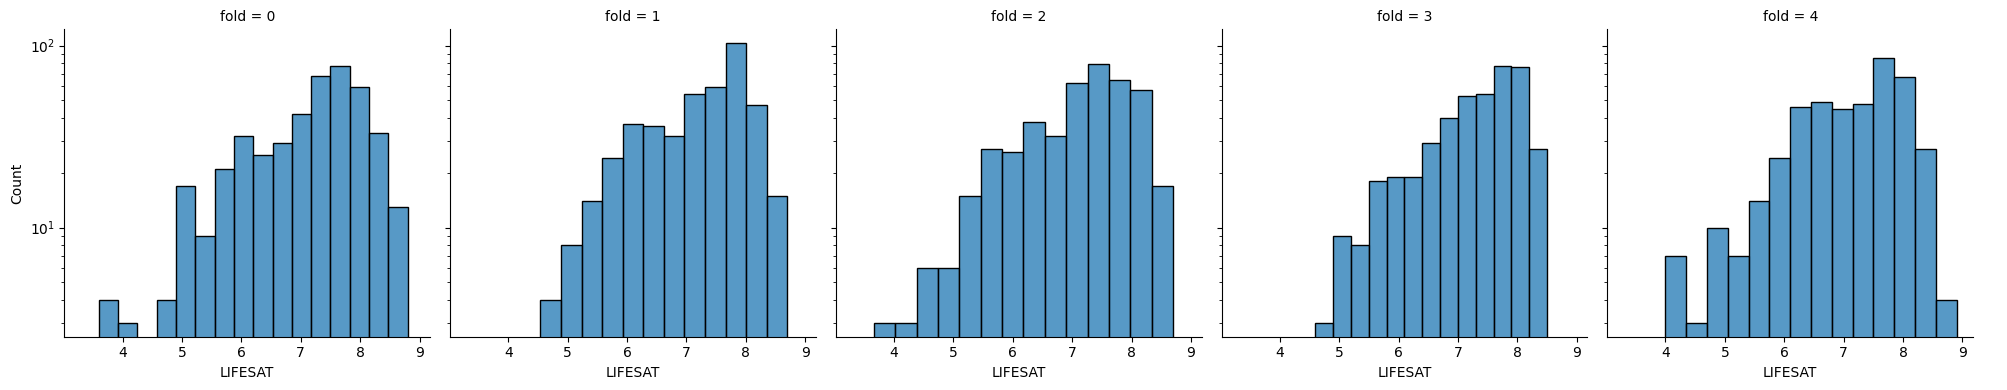

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(df_happiness, col='fold', height=4)
g.map_dataframe(sns.histplot, x='LIFESAT')
g.set(yscale ='log')
g.add_legend()
plt.savefig(os.path.join(data_dir, 'LifeSatDistribution_Splits.png'))

In [ ]:
categorical_columns = [col for col in df_happiness.columns[:-1] if df_happiness[col].nunique() < 40]
categorical_columns

['isced11', 'sex', 'age', 'geo', 'time']

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import numpy as np

# Ordinal Encoding for features with text
ct = ColumnTransformer([("ordinal_encoder", OrdinalEncoder(), ['isced11', 'sex', 'age', 'geo', 'time'])],
                        remainder='passthrough')

X = pd.DataFrame(ct.fit_transform(df_happiness),
                 columns=df_happiness.columns)

rmses = []
for fold in range(n_splits):
  X_train = X[X['fold']!=fold].copy()
  X_test = X[X['fold']==fold].copy()

  y_train = X_train.pop('LIFESAT')
  y_test = X_test.pop('LIFESAT')

  X_train = X_train.drop('fold', axis=1)
  X_test = X_test.drop('fold', axis=1)

  # Fill missing values
  X_train.fillna(0, inplace=True)
  X_test.fillna(0, inplace=True)

  # train model
  model = DecisionTreeRegressor(max_depth=10)
  model.fit(X_train, y_train)

  # make predictions
  predictions = model.predict(X_test)
  rmses.append(mean_squared_error(predictions, y_test, squared=False))

print(f"RMSE: {np.mean(rmses):.4f} ({np.std(rmses):.4f})")

RMSE: 0.3661 (0.0176)


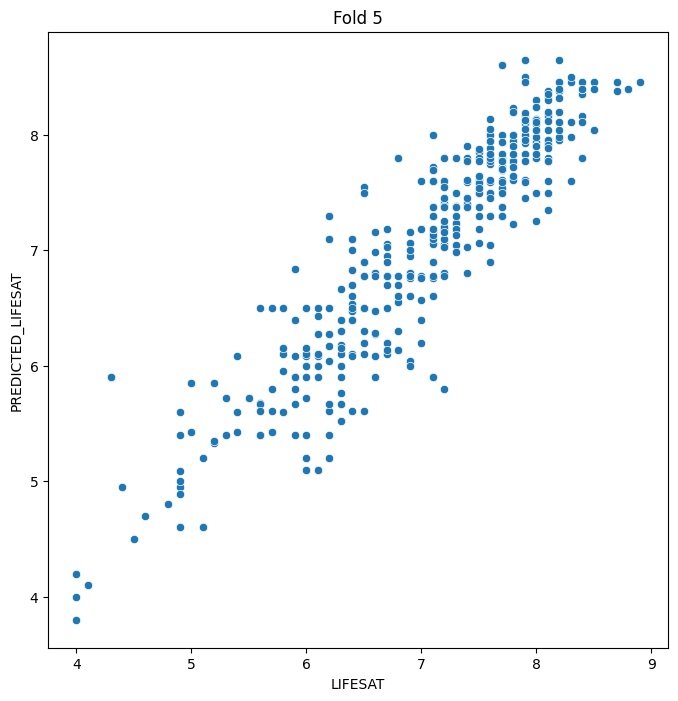

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=y_test, y=model.predict(X_test))
plt.title('Fold 5')
plt.xlabel('LIFESAT')
plt.ylabel('PREDICTED_LIFESAT')
plt.show()

# UP NEXT

[Python Multimedia](https://colab.research.google.com/drive/1V6HPKQlY7HpmXXy8xZyt5u5uuUCwlD9h?usp=sharing)